## Exercise 7

#### Task 7.1

Combine year 2019 and year 2020’s crime records into one pandas dataframe. Drop duplicates as well as any record that has missing values in the following columns: “INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. Save the “cleaned” pandas dataframe to a separate csv file. Use the "OFFENSE_DESCRIPTION" column to identify violent vs. property crime incidents, and based on the cleaned dataframe, count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively. Print the results. Do you see any trend? 

In [72]:
import os
os.chdir('/Users/[editted]/Dropbox/work/compsoc/dataset')
os.getcwd()
os.listdir()

import pandas as pd

In [73]:
ci19= pd.read_csv('crime_incidents_2019.csv')
ci20= pd.read_csv('crime_incidents_2020.csv')

combined_1920=pd.concat([ci19, ci20])
cleanlist=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE']
crime_cleaned=combined_1920.dropna(subset=cleanlist).drop_duplicates(subset=cleanlist)
crime_cleaned.to_csv('crime_cleaned.csv', index=False)
crime_cleaned

/var/folders/1b/s20n0f295fn5s0f986q3fppc0000gn/T/ipykernel_20034/2923864196.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ci19= pd.read_csv('crime_incidents_2019.csv')
/var/folders/1b/s20n0f295fn5s0f986q3fppc0000gn/T/ipykernel_20034/2923864196.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ci20= pd.read_csv('crime_incidents_2020.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,102091671,2647,NaN,THREATS TO DO BODILY HARM,B3,417,0,2019-11-12 12:00:00,2019,11,Tuesday,12,NaN,MORA ST,42.282082,-71.073649,"(42.28208197671972, -71.07364874515646)"
1,102095489,3115,NaN,INVESTIGATE PERSON,E18,520,0,2019-11-25 16:30:00,2019,11,Monday,16,NaN,POYDRAS ST,42.256216,-71.124019,"(42.256215920402155, -71.12401947329023)"
2,102096818,2905,NaN,VAL - VIOLATION OF AUTO LAW,A1,,0,2019-11-30 21:00:00,2019,11,Saturday,21,NaN,SUDBURY ST & CAMBRIDGE ST\nBOSTON MA 02108\nU...,42.360866,-71.061316,"(42.360866027118476, -71.0613160019785)"
4,129099920,3301,NaN,VERBAL DISPUTE,B2,330,0,2019-12-12 07:50:00,2019,12,Thursday,7,NaN,COLUMBIA ROAD,0.000000,0.000000,"(0, 0)"
5,129099936,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,B2,288,0,2019-11-29 06:00:00,2019,11,Friday,6,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70889,20063425,3114,NaN,INVESTIGATE PROPERTY,A7,21,0,2020-09-01 00:00:00,2020,9,Tuesday,0,NaN,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
70890,20062356,1107,NaN,FRAUD - IMPERSONATION,E18,520,0,2020-08-28 18:39:00,2020,8,Friday,18,NaN,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
70891,20046400,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,2020-07-02 01:38:00,2020,7,Thursday,1,NaN,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
70892,20038446,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,2020-06-03 01:15:00,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


In [74]:
crime_cleaned['offense_type'] = None
crime_cleaned['offense_type'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
crime_cleaned['offense_type'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|auto theft|arson')] = 'property crime'
print(crime_cleaned['offense_type'].value_counts())
describe_crime=crime_cleaned.groupby(['YEAR', 'offense_type']).agg({'INCIDENT_NUMBER': 'count'}).reset_index().sort_values(by=['offense_type'])
describe_crime

property crime    25385
violent crime     13476
Name: offense_type, dtype: int64


/var/folders/1b/s20n0f295fn5s0f986q3fppc0000gn/T/ipykernel_20034/785444751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['offense_type'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
/var/folders/1b/s20n0f295fn5s0f986q3fppc0000gn/T/ipykernel_20034/785444751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['offense_type'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|auto theft|arson')] = 'property crime'


,YEAR,offense_type,INCIDENT_NUMBER
0,2019,property crime,13158
2,2020,property crime,12227
1,2019,violent crime,8324
3,2020,violent crime,5152


#### Task 7.2 

Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
crime_cleaned['vc'] = None
crime_cleaned['vc'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'vc'
crime_cleaned['pc'] = None
crime_cleaned['pc'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'pc'

describe_pc=crime_cleaned.groupby(['YEAR', 'pc']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
describe_vc=crime_cleaned.groupby(['YEAR', 'vc']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
describe_merge=describe_pc.merge(describe_vc, how='inner', on='YEAR', suffixes=('_pc','_vc')).drop(['pc','vc'], axis=1)
describe_merge

/var/folders/1b/s20n0f295fn5s0f986q3fppc0000gn/T/ipykernel_20034/1595761982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['vc'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'vc'
/var/folders/1b/s20n0f295fn5s0f986q3fppc0000gn/T/ipykernel_20034/1595761982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['pc'][crime_cleaned['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'pc'


,YEAR,INCIDENT_NUMBER_pc,INCIDENT_NUMBER_vc
0,2019,13158,8324
1,2020,12227,5152


Text(0, 0.5, 'Annual violent crime count')

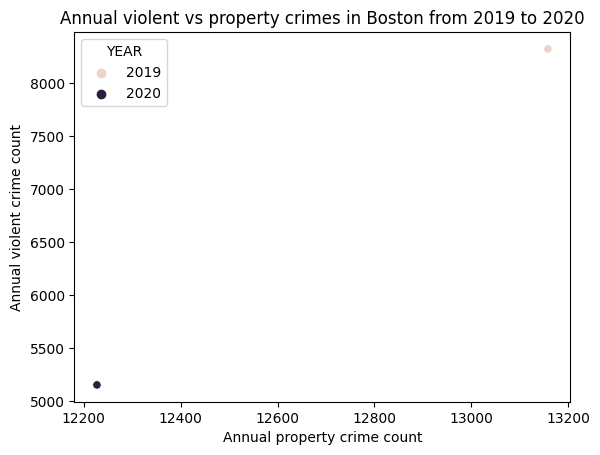

In [76]:
sns.scatterplot(x='INCIDENT_NUMBER_pc', y='INCIDENT_NUMBER_vc', data=describe_merge, hue='YEAR')
plt.title("Annual violent vs property crimes in Boston from 2019 to 2020")
plt.xlabel("Annual property crime count")
plt.ylabel("Annual violent crime count")

#### Task 7.3 
Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. X axis: districts. Y axis: annual sums. Use different bars to represent data from different years. 

In [77]:
cc_yd=crime_cleaned.groupby(['YEAR','DISTRICT', 'offense_type']).agg({'INCIDENT_NUMBER':'count'}).reset_index()
cc_ydsum=cc_yd.groupby(['YEAR','DISTRICT']).agg({'INCIDENT_NUMBER':'sum'}).reset_index()
cc_ydsum

,YEAR,DISTRICT,INCIDENT_NUMBER
0,2019,A1,3135
1,2019,A15,424
2,2019,A7,751
3,2019,B2,2704
4,2019,B3,2157
5,2019,C11,2698
6,2019,C6,1584
7,2019,D14,1305
8,2019,D4,3952
9,2019,E13,1123


Text(0, 0.5, 'Annual violent and property crimes count')

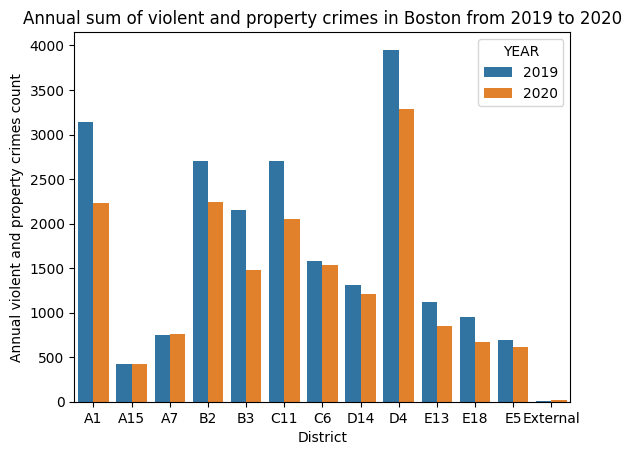

In [78]:
sns.barplot(x='DISTRICT', y='INCIDENT_NUMBER', data=cc_ydsum, hue='YEAR')

plt.title("Annual sum of violent and property crimes in Boston from 2019 to 2020")
plt.xlabel("District")
plt.ylabel("Annual violent and property crimes count")

/Users/gohtk/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


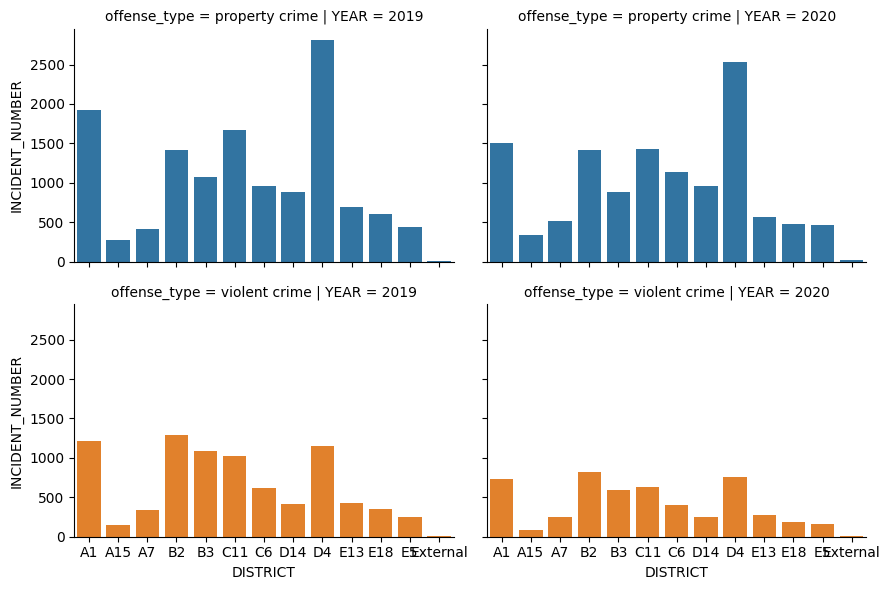

In [79]:
gbar = sns.FacetGrid(cc_yd, col="YEAR",row= 'offense_type', height=3, aspect=1.5, hue='offense_type')
gbar.map(sns.barplot, "DISTRICT", "INCIDENT_NUMBER")

#### Task 7.4 

Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. X axis: quarters. Y axis: district-level shooting incidents (counts).

In [80]:
crime_cleaned.OCCURRED_ON_DATE

0        2019-11-12 12:00:00
1        2019-11-25 16:30:00
2        2019-11-30 21:00:00
4        2019-12-12 07:50:00
5        2019-11-29 06:00:00
                ...         
70889    2020-09-01 00:00:00
70890    2020-08-28 18:39:00
70891    2020-07-02 01:38:00
70892    2020-06-03 01:15:00
70893    2020-05-03 00:00:00
Name: OCCURRED_ON_DATE, Length: 156759, dtype: object

In [81]:
sr=pd.to_datetime(crime_cleaned['OCCURRED_ON_DATE'])
crime_cleaned['quarter'] = sr.dt.to_period('Q')
crime_cleaned['quarter'] 

0        2019Q4
1        2019Q4
2        2019Q4
4        2019Q4
5        2019Q4
          ...  
70889    2020Q3
70890    2020Q3
70891    2020Q3
70892    2020Q2
70893    2020Q2
Name: quarter, Length: 156759, dtype: period[Q-DEC]

In [82]:
crime_cleaned['SHOOTING'].describe()

count    156759.000000
mean          0.012242
std           0.109963
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SHOOTING, dtype: float64

In [83]:
cc_qd=crime_cleaned.groupby(['quarter','DISTRICT']).agg({'SHOOTING':'sum'}).reset_index()
cc_qd

,quarter,DISTRICT,SHOOTING
0,2019Q1,A1,0
1,2019Q1,A15,0
2,2019Q1,A7,4
3,2019Q1,B2,33
4,2019Q1,B3,32
...,...,...,...
97,2020Q4,D4,5
98,2020Q4,E13,7
99,2020Q4,E18,18
100,2020Q4,E5,7


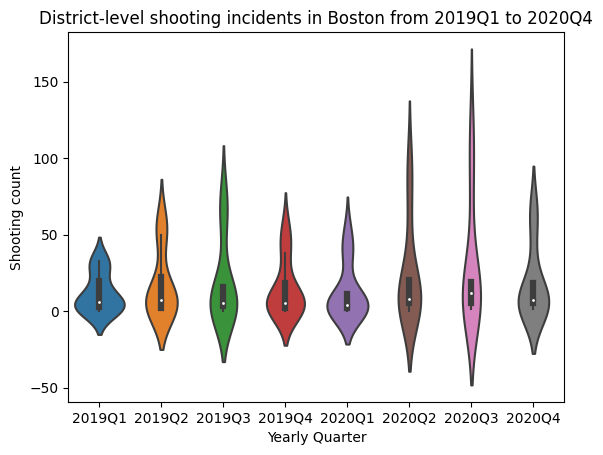

In [84]:
sns.violinplot(y='SHOOTING', x='quarter', data=cc_qd)

plt.title("District-level shooting incidents in Boston from 2019Q1 to 2020Q4")
plt.xlabel("Yearly Quarter")
plt.ylabel("Shooting count")

plt.show()
plt.close()